Importamos las librerias necesarias

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


Cargamos el dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Lee el dataset desde Google Drive
df=pd.read_csv("/content/drive/MyDrive/Proyecto Capstone/Impact_of_Remote_Work_on_Mental_Health.csv")

#Muestra las primeras filas
df.head(10)


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


Vision General de los Datos

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [ ]:
# Checking the count of unique values in each column
df.nunique()

,0
Employee_ID,5000
Age,39
Gender,4
Job_Role,7
Industry,7
Years_of_Experience,35
Work_Location,3
Hours_Worked_Per_Week,41
Number_of_Virtual_Meetings,16
Work_Life_Balance_Rating,5


Revisamos si hay datos faltantes

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
Mental_Health_Condition,1196
Physical_Activity,1629


In [ ]:
# Imputación con la moda para 'Mental_Health_Condition'
moda_mental = df['Mental_Health_Condition'].mode()[0]
df['Mental_Health_Condition'].fillna(moda_mental, inplace=True)

print(df.isnull().sum())

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition                 0
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=np.number).columns
numerical_data = df[numerical_features]

# Normalización (MinMaxScaler)
min_max_scaler = MinMaxScaler()
data_normalizado = min_max_scaler.fit_transform(numerical_data)

# Estandarización (StandardScaler)
standard_scaler = StandardScaler()
data_estandarizado = standard_scaler.fit_transform(numerical_data)

# Create a new DataFrame with scaled numerical features
df_scaled = pd.DataFrame(data_normalizado, columns=numerical_features, index=df.index)

# Concatenate scaled numerical features with original non-numerical features
df_final = pd.concat([df.drop(columns=numerical_features), df_scaled], axis=1)

Resumen Estadistico

In [ ]:
df.describe()


,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


**Pre-procesamiento de Datos**

In [ ]:
df=df.drop(columns='Employee_ID',axis=1)

In [ ]:
df=df.drop(columns='Industry',axis=1)

In [ ]:
df['Work_Location'].unique()

array(['Hybrid', 'Remote', 'Onsite'], dtype=object)

In [ ]:
df['Region'].unique()

array(['Europe', 'Asia', 'North America', 'South America', 'Oceania',
       'Africa'], dtype=object)

In [ ]:
df.head(3)

,Age,Gender,Job_Role,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,Non-binary,HR,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America


**Codigo**

In [ ]:
from sklearn.preprocessing import LabelEncoder

Genero

In [ ]:
df['Gender'].unique()

array(['Non-binary', 'Female', 'Male', 'Prefer not to say'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [ ]:
df.head(3)

,Age,Gender,Job_Role,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,2,HR,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,0,Data Scientist,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,2,Software Engineer,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America


GENDER TABLE

* FEMALE=0
* MALE=1
* NON-BİNARY=2
* Prefer not to say=3

In [ ]:
df['Job_Role'].unique()

array(['HR', 'Data Scientist', 'Software Engineer', 'Sales', 'Marketing',
       'Designer', 'Project Manager'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Job_Role'] = encoder.fit_transform(df['Job_Role'])

In [ ]:
df['Job_Role'].unique()

array([2, 0, 6, 5, 3, 1, 4])

Job_Role TABLE

* Data Scientist = 0
* Designer = 1
* HR = 2
* Marketing = 3
* Project Manager = 4
* Sales = 5
* Software Engineer = 6

In [ ]:
df['Work_Location'].unique()

array(['Hybrid', 'Remote', 'Onsite'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Work_Location'] = encoder.fit_transform(df['Work_Location'])

Work_Location TABLE
* Hybrid = 0
* Onsite = 1
* Remote = 2

In [ ]:
df['Stress_Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Stress_Level'] = encoder.fit_transform(df['Stress_Level'])

Stress_Level TABLE

* High = 0
* Low = 1
* Medium = 2

In [ ]:
df['Mental_Health_Condition'].unique()

array(['Depression', 'Anxiety', 'Burnout'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Mental_Health_Condition'] = encoder.fit_transform(df['Mental_Health_Condition'])

Mental_Health_Condition TABLE

* Anxiety = 0
* Burnout = 1
* Depression = 2



In [ ]:
df['Access_to_Mental_Health_Resources'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Access_to_Mental_Health_Resources'] = encoder.fit_transform(df['Access_to_Mental_Health_Resources'])

Access_to_Mental_Health_Resources TABLE

* No = 0
* Yes = 1

In [ ]:
df['Productivity_Change'].unique()

array(['Decrease', 'Increase', 'No Change'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Productivity_Change'] = encoder.fit_transform(df['Productivity_Change'])

Productivity_Change TABLE

* Decrease = 0
* Increase = 1
* No Change = 2

In [ ]:
df['Satisfaction_with_Remote_Work'].unique()

array(['Unsatisfied', 'Satisfied', 'Neutral'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Satisfaction_with_Remote_Work'] = encoder.fit_transform(df['Satisfaction_with_Remote_Work'])

Satisfaction_with_Remote_Work TABLE

* Neutral = 0
* Satisfied = 1
* Unsatisfied = 2

In [ ]:
df['Physical_Activity'].unique()

array(['Weekly', nan, 'Daily'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Physical_Activity'] = encoder.fit_transform(df['Physical_Activity'])

Physical_Activity TABLE

* Daily = 0
* Weekly = 1

In [ ]:
df['Sleep_Quality'].unique()

array(['Good', 'Poor', 'Average'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Sleep_Quality'] = encoder.fit_transform(df['Sleep_Quality'])

Sleep_Quality TABLE

* Average = 0
* Good = 1
* Poor = 2

In [ ]:
df['Region'].unique()

array(['Europe', 'Asia', 'North America', 'South America', 'Oceania',
       'Africa'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df['Region'] = encoder.fit_transform(df['Region'])

Region TABLE

* Africa = 0
* Asia = 1
* Europe = 2
* North America = 3
* Oceania = 4
* South America = 5

**Datos de entrenamiento**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
y=df["Mental_Health_Condition"]
x=df.drop("Mental_Health_Condition", axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Anxiety','Burnout','Depression'], yticklabels = ['Anxiety','Burnout','Depression'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight="balanced", random_state=1)

In [ ]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00      1997
           2       1.00      1.00      1.00       994

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



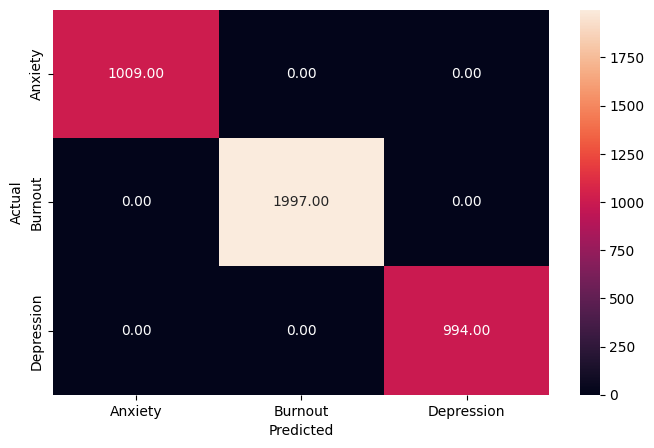

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.29      0.24      0.26       269
           1       0.48      0.50      0.49       479
           2       0.26      0.28      0.27       252

    accuracy                           0.38      1000
   macro avg       0.34      0.34      0.34      1000
weighted avg       0.37      0.38      0.37      1000



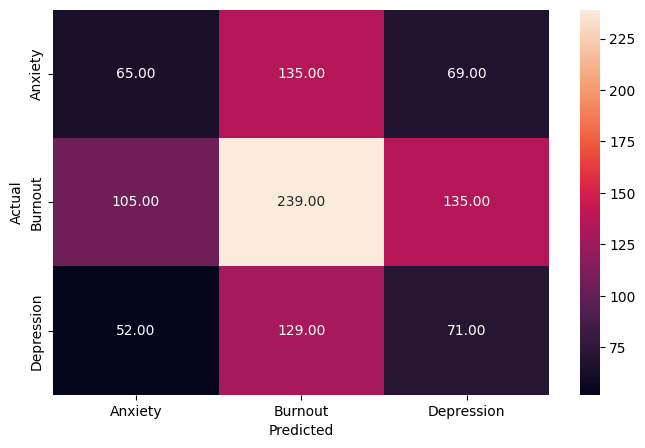

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.342041,0.340779,0.375


In [ ]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=5,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.30      0.33      0.31      1009
           1       0.52      0.14      0.23      1997
           2       0.27      0.64      0.38       994

    accuracy                           0.31      4000
   macro avg       0.36      0.37      0.31      4000
weighted avg       0.40      0.31      0.29      4000



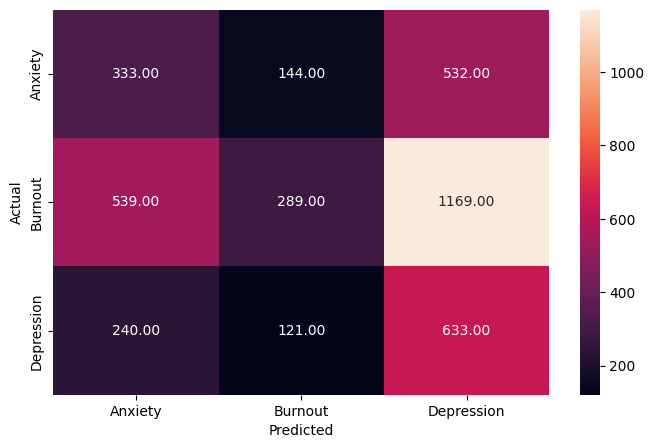

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.26      0.28      0.27       269
           1       0.52      0.16      0.24       479
           2       0.25      0.56      0.34       252

    accuracy                           0.29      1000
   macro avg       0.34      0.33      0.28      1000
weighted avg       0.38      0.29      0.27      1000



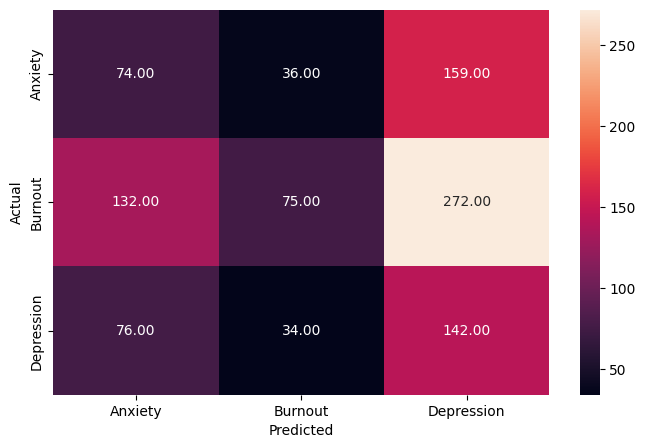

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.34249,0.33172,0.291


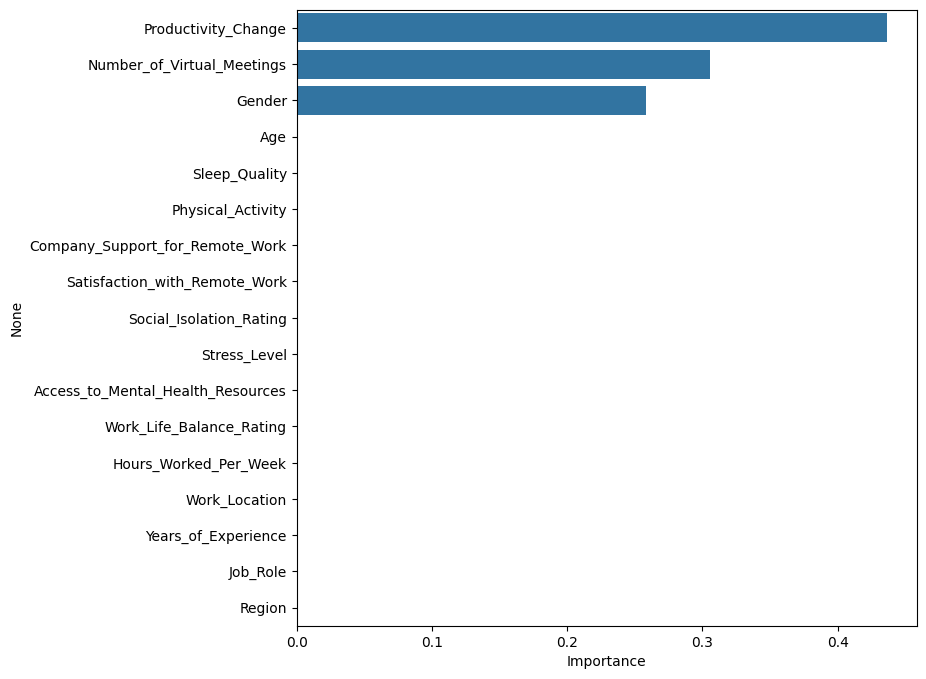

In [ ]:
importances = dtree_estimator.feature_importances_

columns = x.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

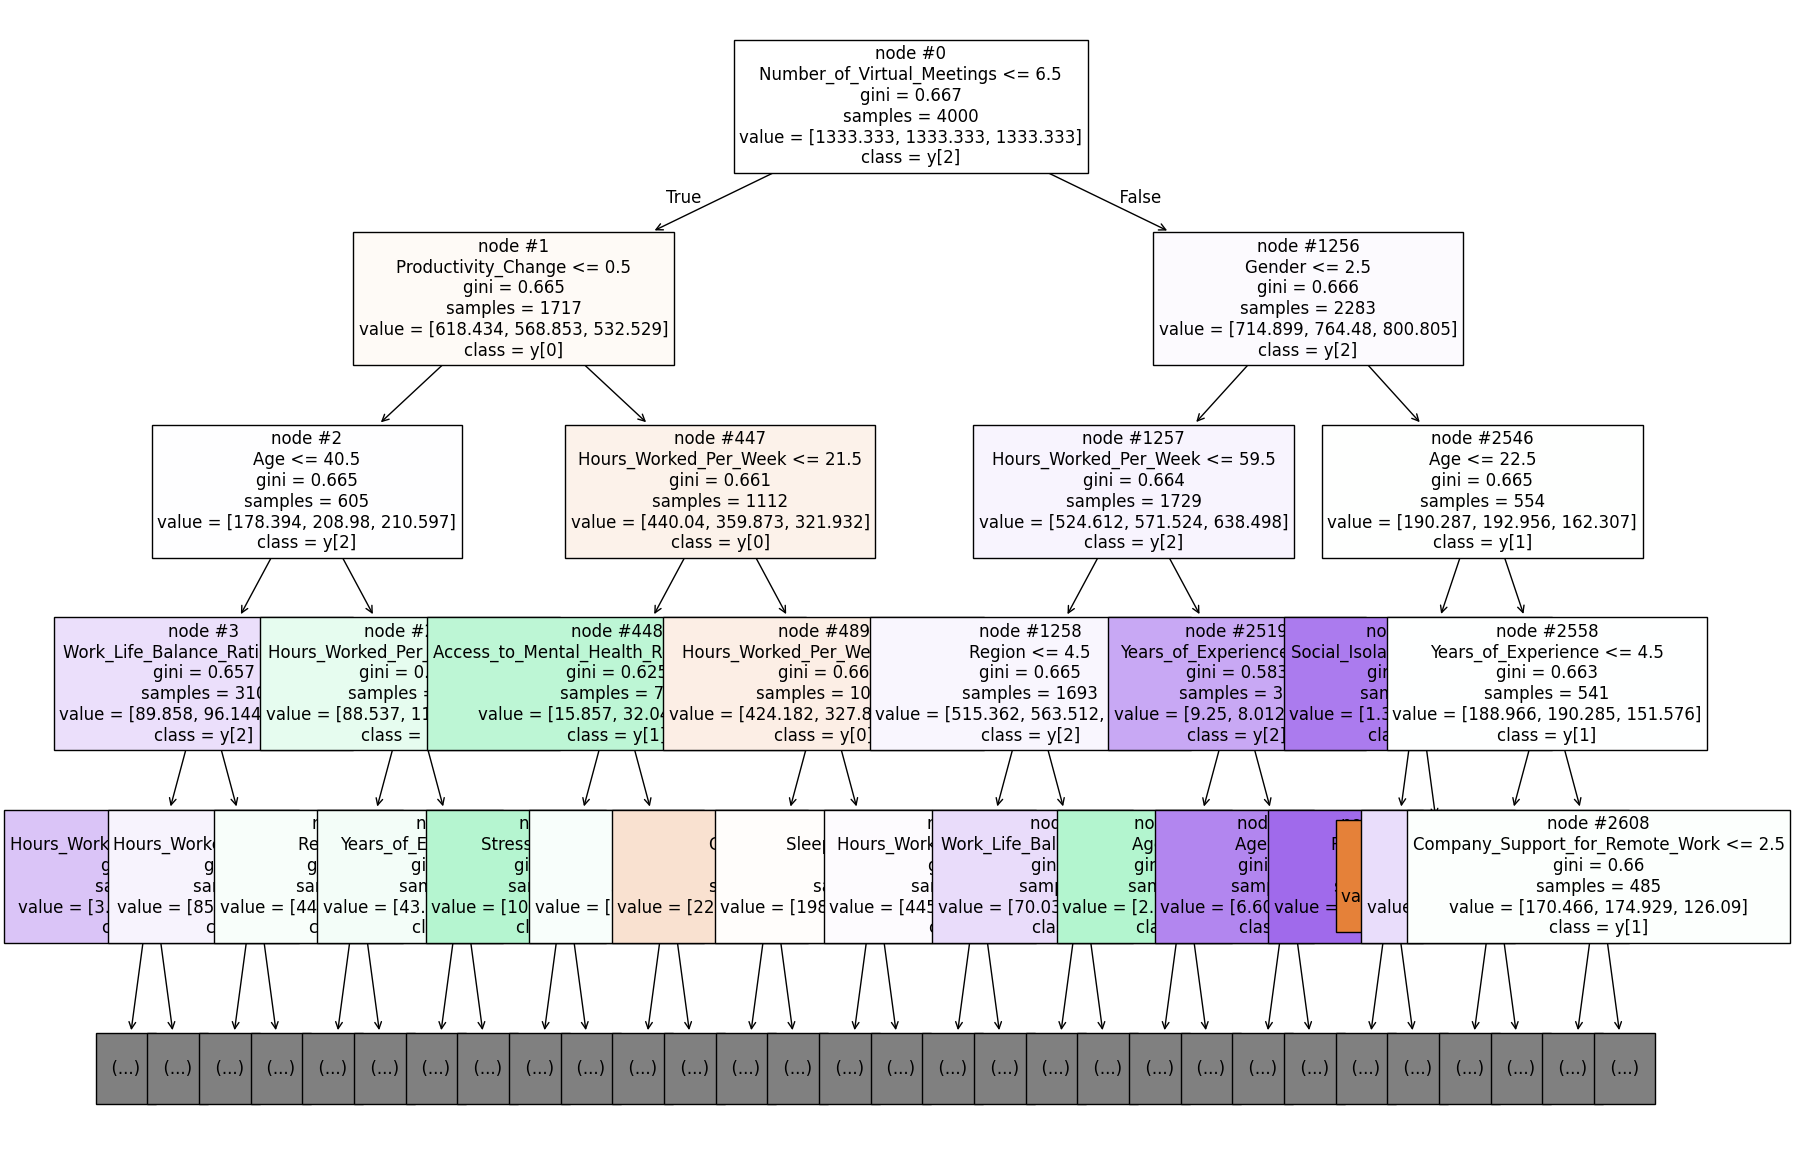

In [ ]:
features = list(x.columns)

plt.figure(figsize = (20, 15))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

#Random Forest

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight="balanced", random_state=1)
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00      1997
           2       1.00      1.00      1.00       994

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



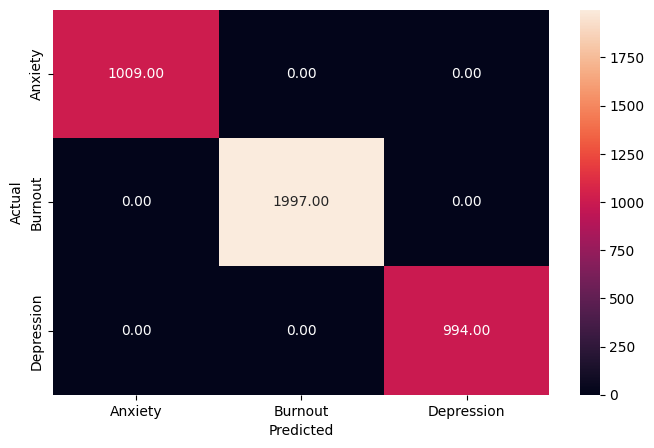

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.25      0.01      0.02       269
           1       0.47      0.97      0.64       479
           2       0.08      0.00      0.01       252

    accuracy                           0.47      1000
   macro avg       0.27      0.33      0.22      1000
weighted avg       0.32      0.47      0.31      1000



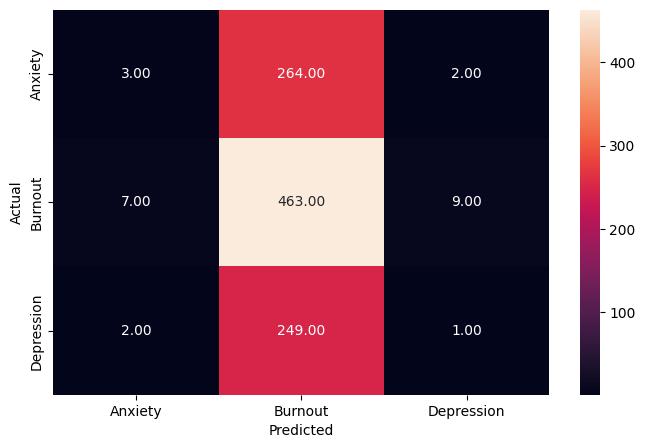

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.26924,0.327239,0.467


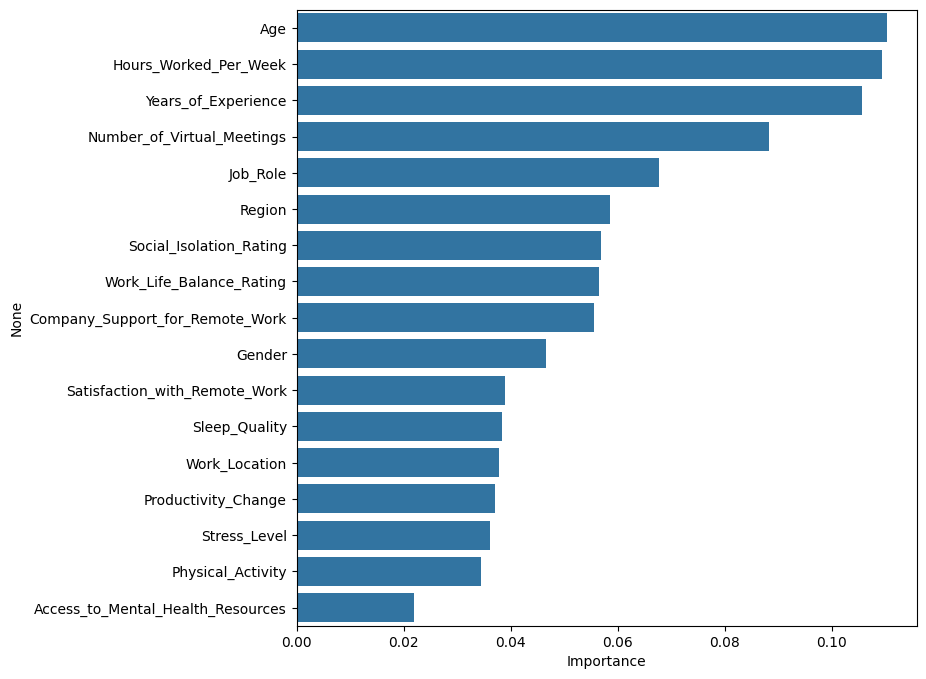

In [ ]:
importances = rf_estimator.feature_importances_

columns = x.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

Tuning the Random Forest classifier

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=0.7,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00      1997
           2       1.00      1.00      1.00       994

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



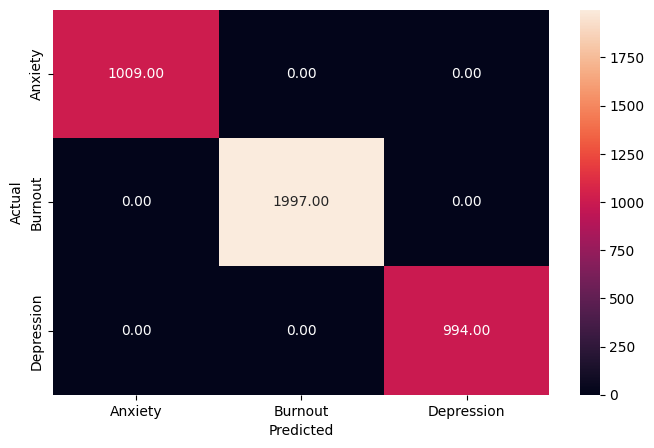

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.22      0.02      0.04       269
           1       0.48      0.94      0.63       479
           2       0.38      0.04      0.07       252

    accuracy                           0.47      1000
   macro avg       0.36      0.33      0.25      1000
weighted avg       0.38      0.47      0.33      1000



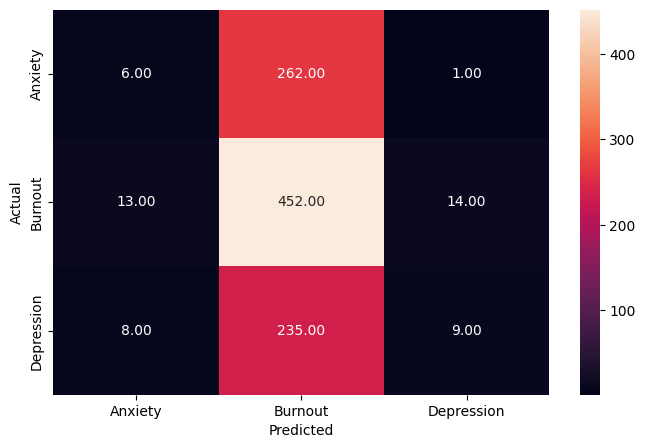

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.357838,0.333884,0.467


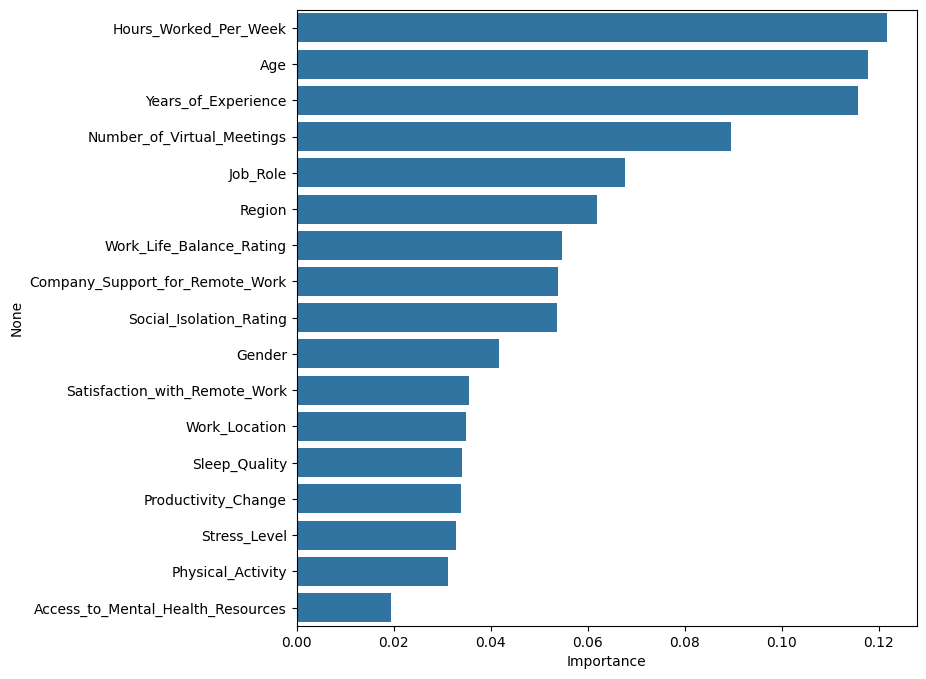

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = x.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

XGBoost

In [ ]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [ ]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [ ]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(x_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,x_test,y_test)


adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.159667,0.333333,0.479


In [ ]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(x_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, x_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.323433,0.333188,0.466


In [ ]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,x_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.335403,0.33219,0.411


In [ ]:
models_test_comp_df = pd.concat(

    [
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T, adaboost_model_perf_test.T,
    gbc_perf_test.T, xgb_perf_test.T
    ],

    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "Gradientboost classifier",
    "XGBoost classifier"
]

In [ ]:
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,Adaboost classifier,Gradientboost classifier,XGBoost classifier
Precision,0.342041,0.34249,0.269240,0.357838,0.159667,0.323433,0.335403
Recall,0.340779,0.33172,0.327239,0.333884,0.333333,0.333188,0.332190
Accuracy,0.375000,0.29100,0.467000,0.467000,0.479000,0.466000,0.411000
